In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")
#merged_data_df = pd.read_csv("Resources/merged_output.csv")
#merged_data_df.head()
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [4]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, 
#### standard deviation for each pollutants verses county

#### Calculations for O3 AQI:

In [8]:
# Group by County and aggregate mean, median, variance, standard deviation of the O3 AQI (Ozone Air Quality Index) for each County.
stat_O3_df = data_df.groupby(['County', 'Year']).agg({'O3 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_O3_df.head()

O3 AQI                                              
                    amax amin       mean median         var        std
County       Year                                                     
Alameda      2007     27    3  17.833333   19.5   52.435088   7.241208
             2008     42    1  22.096685   22.0   61.245656   7.825960
             2009     46    2  20.964384   21.0   55.305105   7.436740
             2010     42    1  21.973890   23.0   52.999971   7.280108
Contra Costa 2006    145    3  31.915068   31.0  281.664304  16.782857

In [9]:
# Rename columns for mean, median, variance, standard deviation of the O3 AQI (Ozone Air Quality Index) for each County.

stat_O3_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']
stat_O3_df.head()

Max_Value  Min_Value       Mean  Median    Variance  \
County       Year                                                        
Alameda      2007         27          3  17.833333    19.5   52.435088   
             2008         42          1  22.096685    22.0   61.245656   
             2009         46          2  20.964384    21.0   55.305105   
             2010         42          1  21.973890    23.0   52.999971   
Contra Costa 2006        145          3  31.915068    31.0  281.664304   

                   Standard_Deviation  
County       Year                      
Alameda      2007            7.241208  
             2008            7.825960  
             2009            7.436740  
             2010            7.280108  
Contra Costa 2006           16.782857

In [10]:
# Resetting the Index

O3_df = stat_O3_df.reset_index()
O3_df.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2007,27,3,17.833333,19.5,52.435088,7.241208
1,Alameda,2008,42,1,22.096685,22.0,61.245656,7.825960
2,Alameda,2009,46,2,20.964384,21.0,55.305105,7.436740
3,Alameda,2010,42,1,21.973890,23.0,52.999971,7.280108
4,Contra Costa,2006,145,3,31.915068,31.0,281.664304,16.782857


In [11]:
grouped_df = O3_df.groupby("County")
max_O3_aqi = grouped_df.max()
max_O3_aqi = max_O3_aqi.reset_index()
max_O3_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2010,46,3,22.096685,23.0,61.245656,7.825960
1,Contra Costa,2010,147,5,31.915068,31.0,281.664304,16.782857
2,Fresno,2010,207,5,62.275591,47.0,2089.586508,45.711995
3,Humboldt,2010,46,12,25.181568,25.0,61.125975,7.818310
4,Imperial,2010,147,8,43.412256,39.0,411.310822,20.280799


In [13]:
# Combining two columns
max_O3_aqi["County_Year"] = max_O3_aqi["County"] + "-" + max_O3_aqi["Year"]
max_O3_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,County_Year
0,Alameda,2010,46,3,22.096685,23.0,61.245656,7.825960,Alameda-2010
1,Contra Costa,2010,147,5,31.915068,31.0,281.664304,16.782857,Contra Costa-2010
2,Fresno,2010,207,5,62.275591,47.0,2089.586508,45.711995,Fresno-2010
3,Humboldt,2010,46,12,25.181568,25.0,61.125975,7.818310,Humboldt-2010
4,Imperial,2010,147,8,43.412256,39.0,411.310822,20.280799,Imperial-2010


#### Visual Representation :

In [15]:
# Converting into list for plotting

county = list(max_O3_aqi['County_Year'])
o3_aqi = list(max_O3_aqi['Mean'])


#### # Creating scatter plot for Counties Vs. Average Ozone Air Quality Index

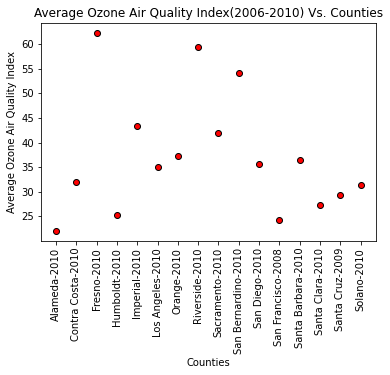

<Figure size 720x2880 with 0 Axes>

In [17]:
# Creating plots for Counties Vs. Average Ozone Air Quality Index

plt.scatter(county, o3_aqi, marker="o", facecolors="red", edgecolors="black")


# Create a title, x label, and y label for our chart
plt.title("Average Ozone Air Quality Index(2006-2010) Vs. Counties")
plt.xlabel("Counties")
plt.ylabel("Average Ozone Air Quality Index")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.

labels = county
plt.xticks(county, labels, rotation='vertical', fontsize=10)


plt.figure(figsize=(10,40))

plt.tight_layout()

plt.savefig('mq_charts/county_avg_o3aqi.png')

plt.show()





#### Based on extensive scientific evidence about the effects of ozone on public health and welfare, on October 1, 2015, EPA strengthened the ground-level ozone standard to 0.070 ppm, averaged over an 8-hour period.

#### Average Ozone Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'Fresno' county has the maximum 'Average Ozone Air Quality Index' from (2006-2010) of 62.275591 ppm 